In [1]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [2]:
%load_ext autotime

time: 244 µs (started: 2021-10-09 18:02:44 +05:30)


In [5]:
path = untar_data(URLs.MNIST_SAMPLE)

time: 1.55 ms (started: 2021-10-09 18:03:07 +05:30)


In [6]:
Path.BASE_PATH = path

time: 385 µs (started: 2021-10-09 18:06:04 +05:30)


In [7]:
path

Path('.')

time: 2.49 ms (started: 2021-10-09 18:06:07 +05:30)


In [10]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

time: 2.28 ms (started: 2021-10-09 18:06:28 +05:30)


In [14]:
t_sevens = [tensor(Image.open(p)).float()/255 for p in (path/'train/7').ls()]
t_threes = [tensor(Image.open(p)).float()/255 for p in (path/'train/3').ls()]

time: 3.29 s (started: 2021-10-09 18:08:37 +05:30)


In [13]:
t_threes[0].shape

torch.Size([28, 28])

time: 1.88 ms (started: 2021-10-09 18:07:59 +05:30)


In [226]:
# create the data loader
# first create x_train and y_train and zip to get the train dataset
# then create the data loader
# repeat for validate
x_train = torch.cat((torch.stack(t_sevens).view(-1, 28*28), torch.stack(t_threes).view(-1, 28*28)))
x_train.shape

torch.Size([12396, 784])

time: 84.7 ms (started: 2021-10-09 19:34:09 +05:30)


In [227]:
y_train = torch.cat((tensor([[1]*len(t_sevens)]).view(-1, 1), tensor([[0]*len(t_threes)]).view(-1, 1)))
y_train.shape

torch.Size([12396, 1])

time: 3.17 ms (started: 2021-10-09 19:34:09 +05:30)


tensor([1])


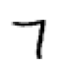

time: 88.1 ms (started: 2021-10-09 19:34:10 +05:30)


In [228]:
dset = list(zip(x_train, y_train))
im, y = first(dset)
show_image(im.view(-1, 28))
print(y)

In [229]:
t_dl = DataLoader(dset, batch_size=100)

time: 519 µs (started: 2021-10-09 19:34:13 +05:30)


In [230]:
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

time: 2.35 ms (started: 2021-10-09 19:34:14 +05:30)


In [231]:
v_sevens = [tensor(Image.open(p)).float()/255 for p in (path/'valid/7').ls()]
v_threes = [tensor(Image.open(p)).float()/255 for p in (path/'valid/3').ls()]
x_train = torch.cat((torch.stack(v_sevens).view(-1, 28*28), torch.stack(v_threes).view(-1, 28*28)))
print(x_train.shape)
y_train = torch.cat((tensor([[1]*len(v_sevens)]).view(-1, 1), tensor([[0]*len(v_threes)]).view(-1, 1)))
print(y_train.shape)
dset = list(zip(x_train, y_train))
v_dl = DataLoader(dset, batch_size=100)

torch.Size([2038, 784])
torch.Size([2038, 1])
time: 547 ms (started: 2021-10-09 19:34:21 +05:30)


In [232]:
# dset[10]

time: 276 µs (started: 2021-10-09 19:34:23 +05:30)


tensor([0])


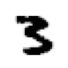

time: 43.4 ms (started: 2021-10-09 19:34:24 +05:30)


In [233]:
im, y = dset[-1]
show_image(im.view(-1, 28))
print(y)

In [235]:
# tensor(t_sevens[1]).unsqueeze(1)

time: 255 µs (started: 2021-10-09 19:34:28 +05:30)


In [236]:
dls = DataLoaders(t_dl, v_dl)

time: 437 µs (started: 2021-10-09 19:34:30 +05:30)


In [258]:
model2 = nn.Sequential(
    nn.Linear(28*28, 10), 
    nn.ReLU(),
    nn.Linear(10, 1))

model1 = nn.Linear(28*28, 1)

time: 1.27 ms (started: 2021-10-09 19:39:45 +05:30)


In [247]:
# learner??

time: 71.5 ms (started: 2021-10-09 19:34:58 +05:30)


In [248]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

time: 564 µs (started: 2021-10-09 19:34:58 +05:30)


In [249]:
def sigmoid(x): return 1/(1+torch.exp(-x))
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

time: 513 µs (started: 2021-10-09 19:34:59 +05:30)


In [257]:
learner = Learner(dls=dls, model=model1, loss_func=mnist_loss, metrics=batch_accuracy, opt_func=SGD)
learner.fit(20, 1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.010545,0.044921,0.963690,00:00
1,0.010517,0.043561,0.965162,00:00
2,0.010482,0.042326,0.965162,00:00
3,0.010443,0.041201,0.965653,00:00
4,0.010401,0.040172,0.966634,00:00
5,0.010358,0.039226,0.966634,00:00
6,0.010315,0.038354,0.967125,00:00
7,0.010273,0.037546,0.968106,00:00
8,0.010233,0.036797,0.969087,00:00
9,0.010194,0.036099,0.969578,00:00


time: 4.6 s (started: 2021-10-09 19:39:07 +05:30)


In [261]:
c_learner = Learner(dls=dls, model=model2, loss_func=mnist_loss, metrics=batch_accuracy, opt_func=SGD)
c_learner.fit(20, .1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.013489,0.022013,0.978901,00:00
1,0.011968,0.020451,0.979882,00:00
2,0.011725,0.020128,0.980373,00:00
3,0.011555,0.019982,0.980864,00:00
4,0.011379,0.019886,0.980864,00:00
5,0.011214,0.019809,0.980864,00:00
6,0.011054,0.019744,0.980864,00:00
7,0.010899,0.019686,0.980373,00:00
8,0.010753,0.019626,0.980373,00:00
9,0.010609,0.019563,0.980864,00:00


time: 7.05 s (started: 2021-10-09 19:42:37 +05:30)


In [243]:
torch.cat?

time: 687 µs (started: 2021-10-09 19:34:38 +05:30)


In [224]:
x, y = first(dls[0])
print(x.shape, y.shape)

torch.Size([10, 784]) torch.Size([10, 1])
time: 2.3 ms (started: 2021-10-09 19:33:40 +05:30)


In [168]:
y_uniq = tensor([])
for x, y in dls[0]:
    y_uniq = torch.cat((y_uniq,y))
print(y_uniq.unique())

tensor([0., 1.])
time: 229 ms (started: 2021-10-09 19:11:14 +05:30)


In [169]:
y_uniq = tensor([])
for x, y in image_dls[0]:
    y_uniq = torch.cat((y_uniq,y))
print(y_uniq.unique())

TensorCategory([0., 1.])
time: 1.67 s (started: 2021-10-09 19:11:17 +05:30)


In [ ]:
learner = Learner

In [260]:
image_dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(image_dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.151814,0.034591,0.994112,01:59


time: 2min 1s (started: 2021-10-09 19:40:19 +05:30)


In [102]:
x, y = first(first(image_dls))
print(x.shape, y.shape)

torch.Size([64, 3, 28, 28]) torch.Size([64])
time: 285 ms (started: 2021-10-09 18:43:37 +05:30)


In [103]:
x, y = first(first(dls))
print(x.shape, y.shape)

torch.Size([10, 784]) torch.Size([10, 1])
time: 3.58 ms (started: 2021-10-09 18:43:42 +05:30)
